In [2]:
import pandas as pd
import numpy as np
import json

import matplotlib.pyplot as plt
import matplotlib

%matplotlib inline

In [3]:
dataDir = '../data/external/'

trumpSample = dataDir + 'trump/donaldtrump_1449187200.txt'
trumpFull = dataDir + 'trump/donaldtrump_1477699200.txt'

In [4]:
# Helper to read the ndljson's
def readNDLJson(f):
    with open(f) as data:
        jsonList = [json.loads(line) for line in data]
    return jsonList

In [4]:
# Function to extract only pertinent information about users
def createUser(tweet):
    try:
        
        # grab the portion of the json that's pertinent to the user
        if (tweet['user']['id']):
            user = tweet['user']

            userID = user['id'] if user['id'] else 0
            created = user['created_at']
            defaultProfile = user['default_profile']

            # Node features
            favCount = user['favourites_count']
            tweetCount = user['statuses_count']

            # Social graph (edge) features
            following = user['following']
            friendsCount = user['friends_count']

            return {'user':user, 'userID':userID, 'createdAt':created, 'numFaves':favCount, 'numTweets':tweetCount,
                   'numFollowing':following, 'numFriends':friendsCount}
        else:
            pass
    except:
        pass

In [5]:
# dict of userID's and a tally of how many tweets there are from each key
tweetTallies = {}

# Function to check a dict
def updateTallies(tweet):
        # sanity check
        if ((tweet['user']) and (tweet['user']['id'])):
            userID = tweet['user']['id']
            
            # dictionairy check
            if tweetTallies.has_key(userID):
                tweetTallies[userID]['tweets'] = tweetTallies[userID]['tweets'] + 1
            # not present, instantiate one
            else:
                tweetTallies[userID] = {'tweets': 1}         

In [6]:
for line in open(trumpFull):
    try:
        updateTallies(json.loads(line))
    except:
        pass

In [7]:
tallyDF = pd.DataFrame.from_dict(tweetTallies, orient='index')
tallyDF.sort_values('tweets', inplace=True, ascending=False)

In [ ]:
def tryJson(js):
    try:
        return json.loads(js)
    except:
        pass

tweetDF = pd.DataFrame.from_records([tryJson(line) for line in open(trumpFull)])

In [9]:
tallyDF.head(10)

,tweets
2823612297,295
742484898896740352,282
451339059,279
90522101,195
22347339,191
751736611260338176,184
102824312,182
786345545308573696,175
764636248476483585,174
724050768106500096,173


In [ ]:
def getID(tweet):
    try:
        
        # grab the portion of the json that's pertinent to the user
        if (tweet['user']['id']):
            return tweet['user']['id']
        
    except:
        return np.nan

tweetDF['uID'] = tweetDF.apply(lambda x: getID(x), axis = 1)

In [ ]:
tweetDF[tweetDF['uID'] == tallyDF.iloc[0].index]['text']

/home/user/.local/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.
  if __name__ == '__main__':


{'boxes': [<matplotlib.lines.Line2D at 0x7f079865b750>],
 'caps': [<matplotlib.lines.Line2D at 0x7f079863f5d0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f06da005350>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f06da005690>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f079865b8d0>,
  <matplotlib.lines.Line2D at 0x7f079865bf50>]}

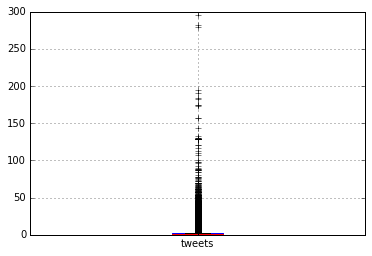

In [10]:
tallyDF.boxplot('tweets')

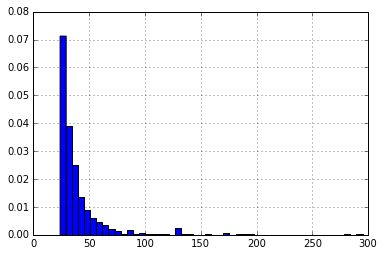

In [14]:
tallyDF['tweets'].iloc[:1000].hist(bins=50, normed=True)

In [5]:
lines = 1000000

In [16]:
import sys

def readChunksTest(chunkSize):
    chunksCount = 0
    with open(trumpFull) as f:
        for chunk in f.readlines(chunkSize):
            print (sys.getsizeof(chunk))
            chunksCount += 1
    return chunksCount

5502
4909
4931
7271
2526
5005
6496
9086
2129
7737
7087
13346
5389
4888
4642
12672
8415
6406
5292
10706
6406
2515
10738
4561
6521
12446
5366
5122
10746
4460
10751
2804
6447
12569
2743
14053
4993
7945
4673
4715
4573
2513
6609
5469
8820
6387
4099
2747
5347
4648
6310
6915
4506
6800
6656
6038
6955
6436
11091
2481
2610
2007
2643
8330
5465
6669
4705
7584
2382
10627
7589
3834
2536
7560
3342
2478
11528
7077
5305
4252
7647
10415
5147
2389
2038
5339
7015
5022
17171
12199
5124
2500
4637
4719
4304
4392
2502
4877
13498
10955
3637
14036
2505
6783
2349
9255
10799
4546
4990
2333
5494
5042
4724
5414
4738
6644
2629
6300
6588
5311
6825
3547
10773
14487
10356
12683
10048
7474
4587
6731
5307
2554
10068
4391
4874
8020
6701
4767
13983
2608
6727
10173
7324
2124
2537
5582
4782
5352
4566
2409
7784
5199
4736
7093
2535
5176
4669
2290
5119
2542
4762
10787
5133
4698
4729
6040


166

In [10]:
%timeit?